In [1]:
import numpy as np 
import pandas as pd

### Q1:

In [2]:
nyc311 = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", low_memory = False)
nyc311_copy = nyc311.copy()
nyc311_copy

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


### Q2

In [3]:
nyc311_copy['Request_Closing_Time']=(pd.to_datetime(nyc311_copy['Closed Date']) - pd.to_datetime(nyc311_copy['Created Date']))

### Q3

In [4]:
import matplotlib.pyplot as plt

In [5]:
nyc311_copy=nyc311_copy.rename(columns={'Complaint Type':'Complaint_Type','Location Type': 'Location_Type',})

In [7]:
x=nyc311_copy.Complaint_Type.value_counts().head(6)

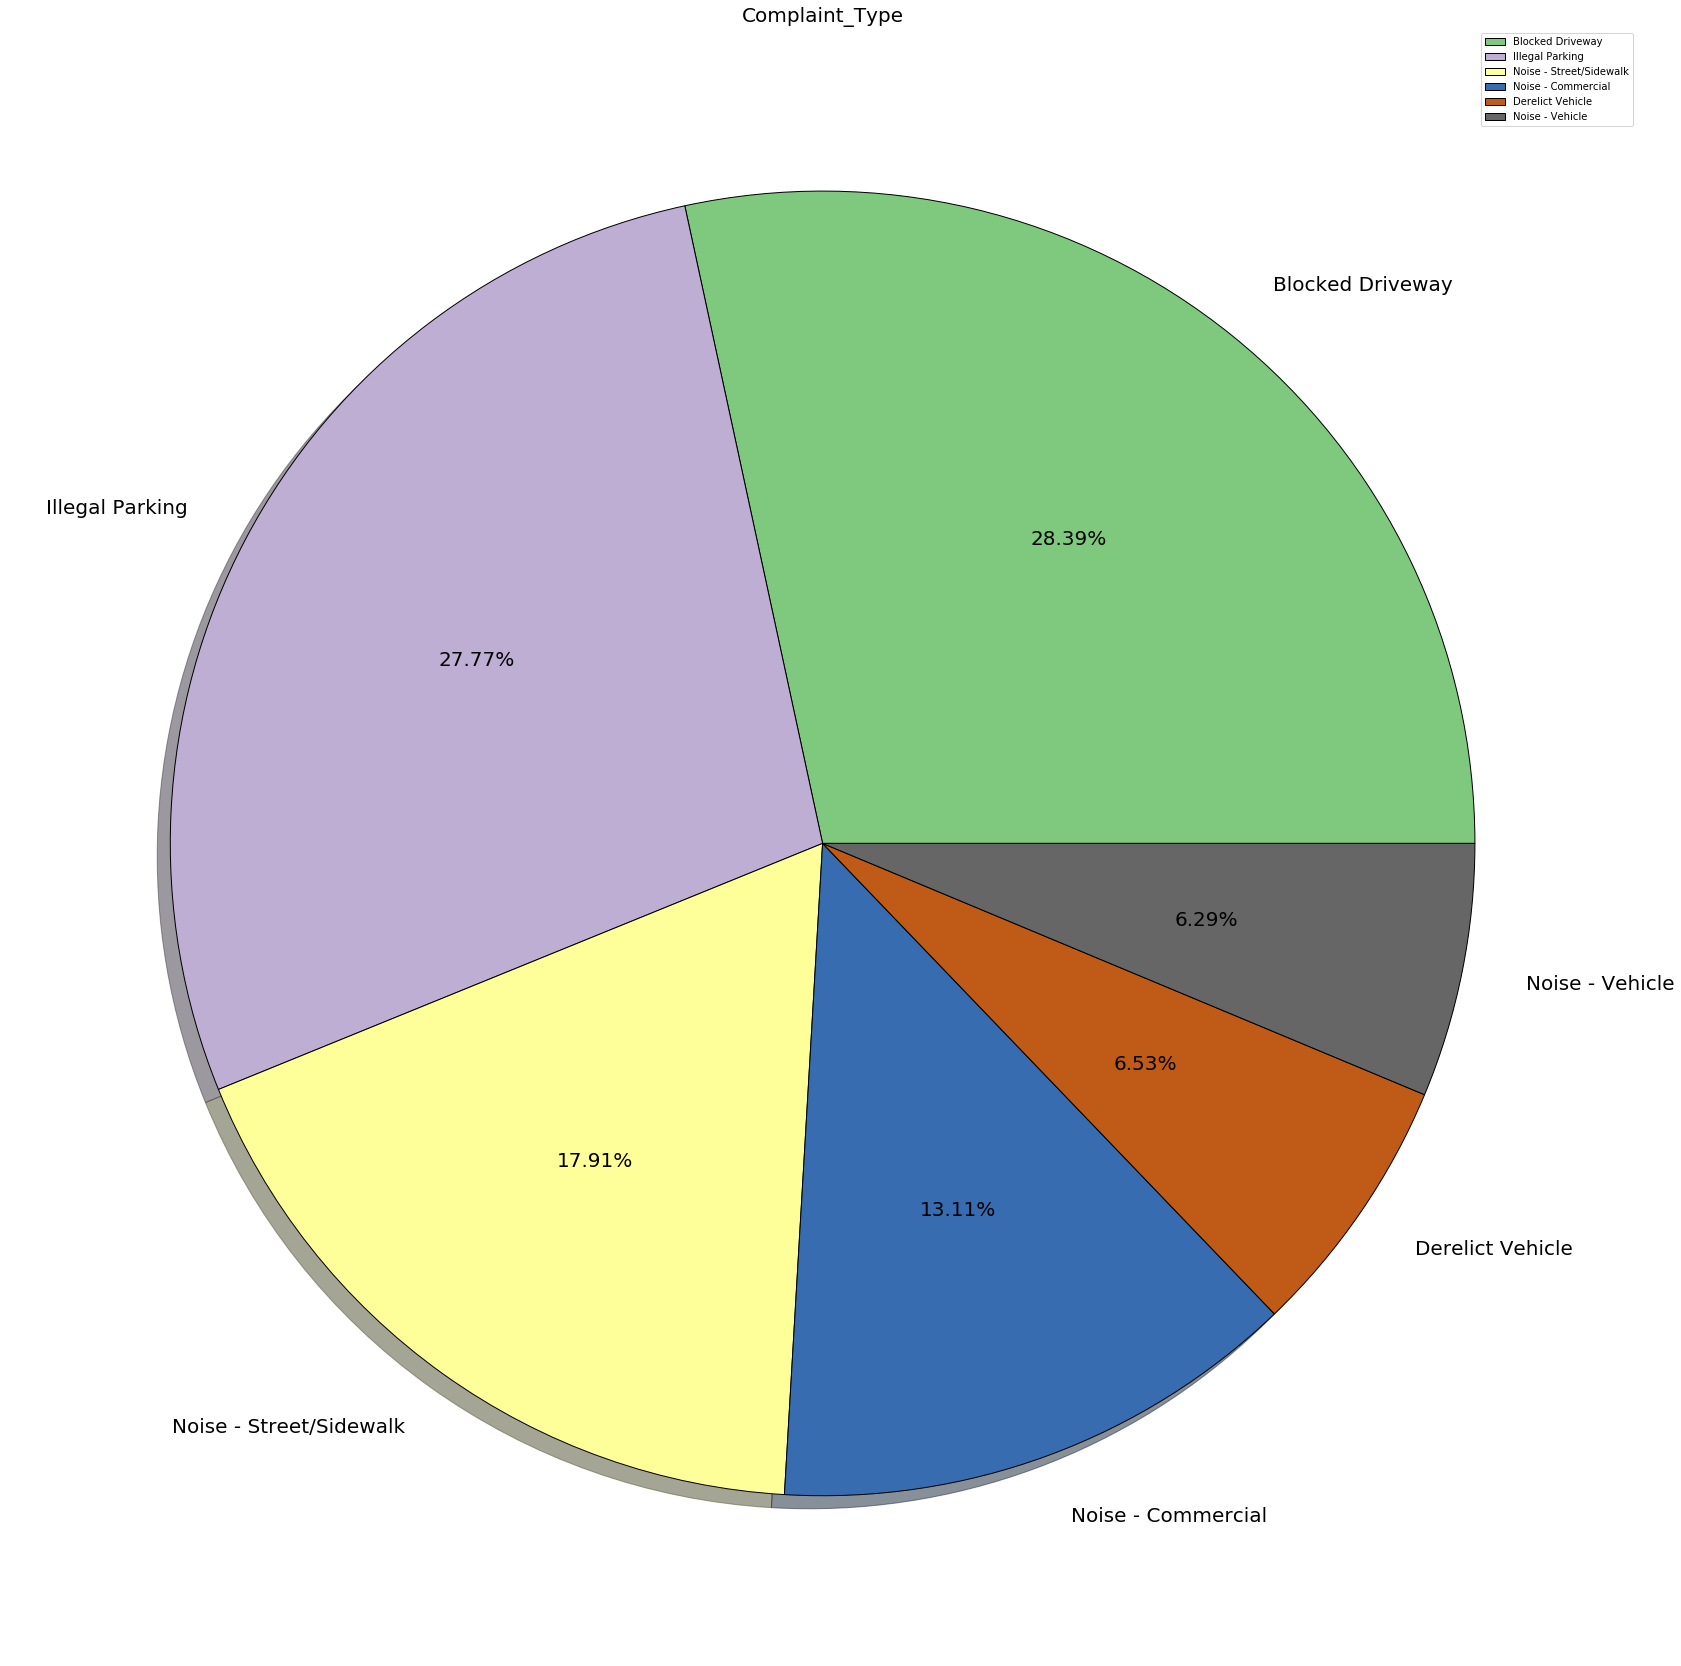

In [8]:
plt.figure(figsize = (100,30)) 
x.plot.pie(radius = 1, cmap = 'Accent', autopct = '%.2f%%', shadow = True,  wedgeprops = {'edgecolor': 'black'},           textprops = {'size' : 20}) 
plt.legend() 
plt.ylabel('') 
plt.title('Complaint_Type', fontdict= {'size' : 20}) 
plt.show()

### The above pie chart has the top 6 complaint type and the highest pecentage of Complaint_Type is Blocked Driveway

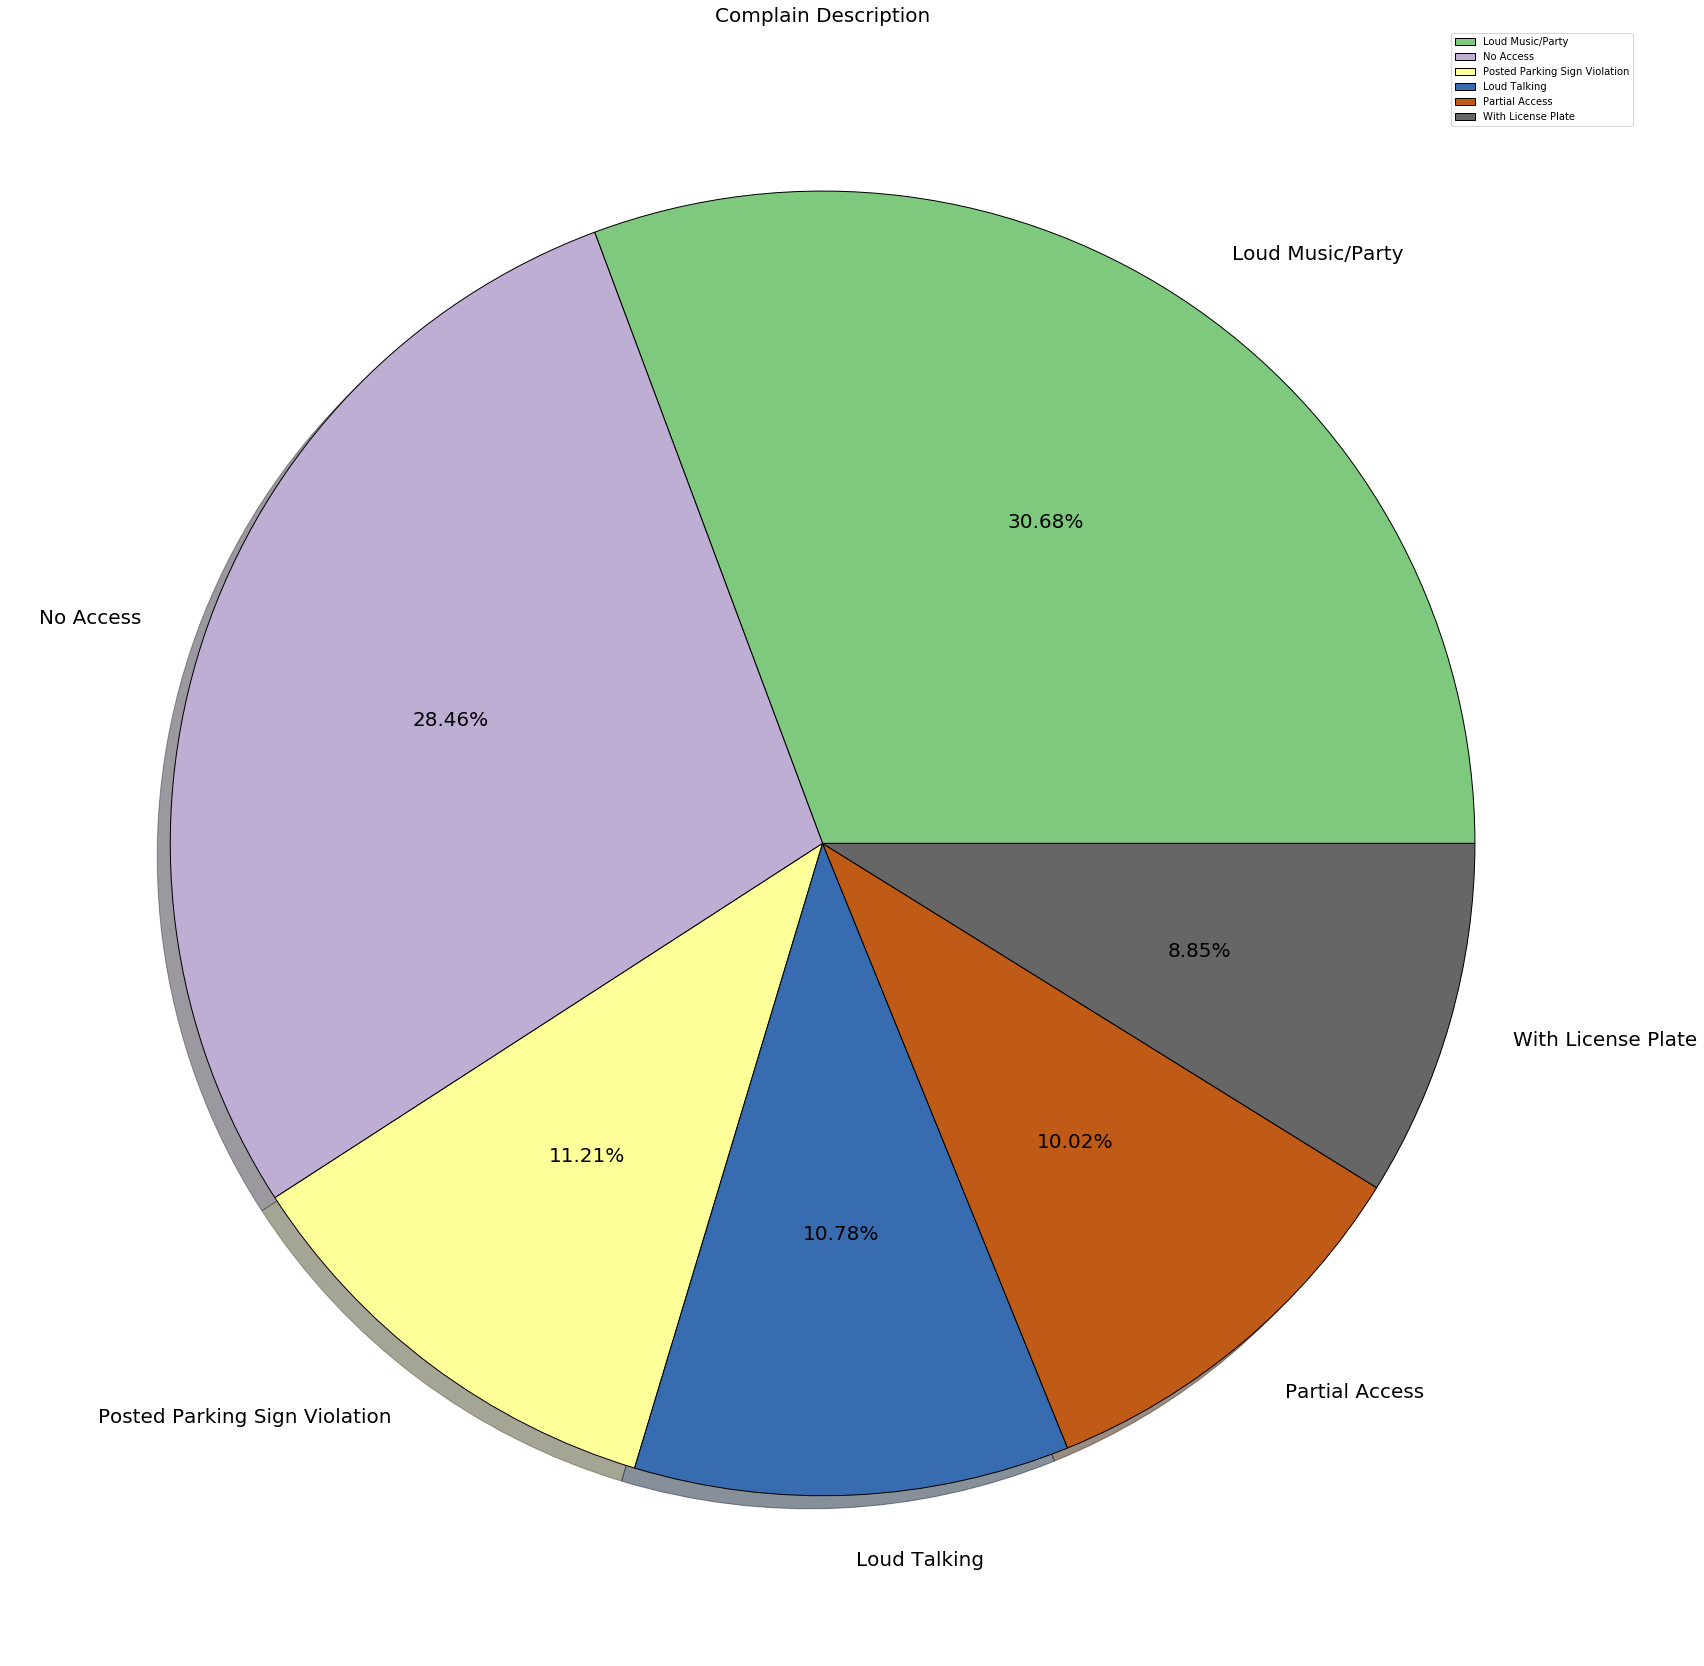

In [11]:
y=nyc311_copy.Descriptor.value_counts().head(6) 
plt.figure(figsize = (100,30)) 
y.plot.pie(radius = 1, cmap = 'Accent', autopct = '%.2f%%', shadow = True, wedgeprops = {'edgecolor': 'black'},           textprops = {'size' : 20}) 
plt.legend() 
plt.ylabel('') 
plt.title('Complain Description', fontdict= {'size' : 20}) 
plt.show()

#### The above pie chart represent the top 6 descriptor and among which Loud music / party is having the highest percentag

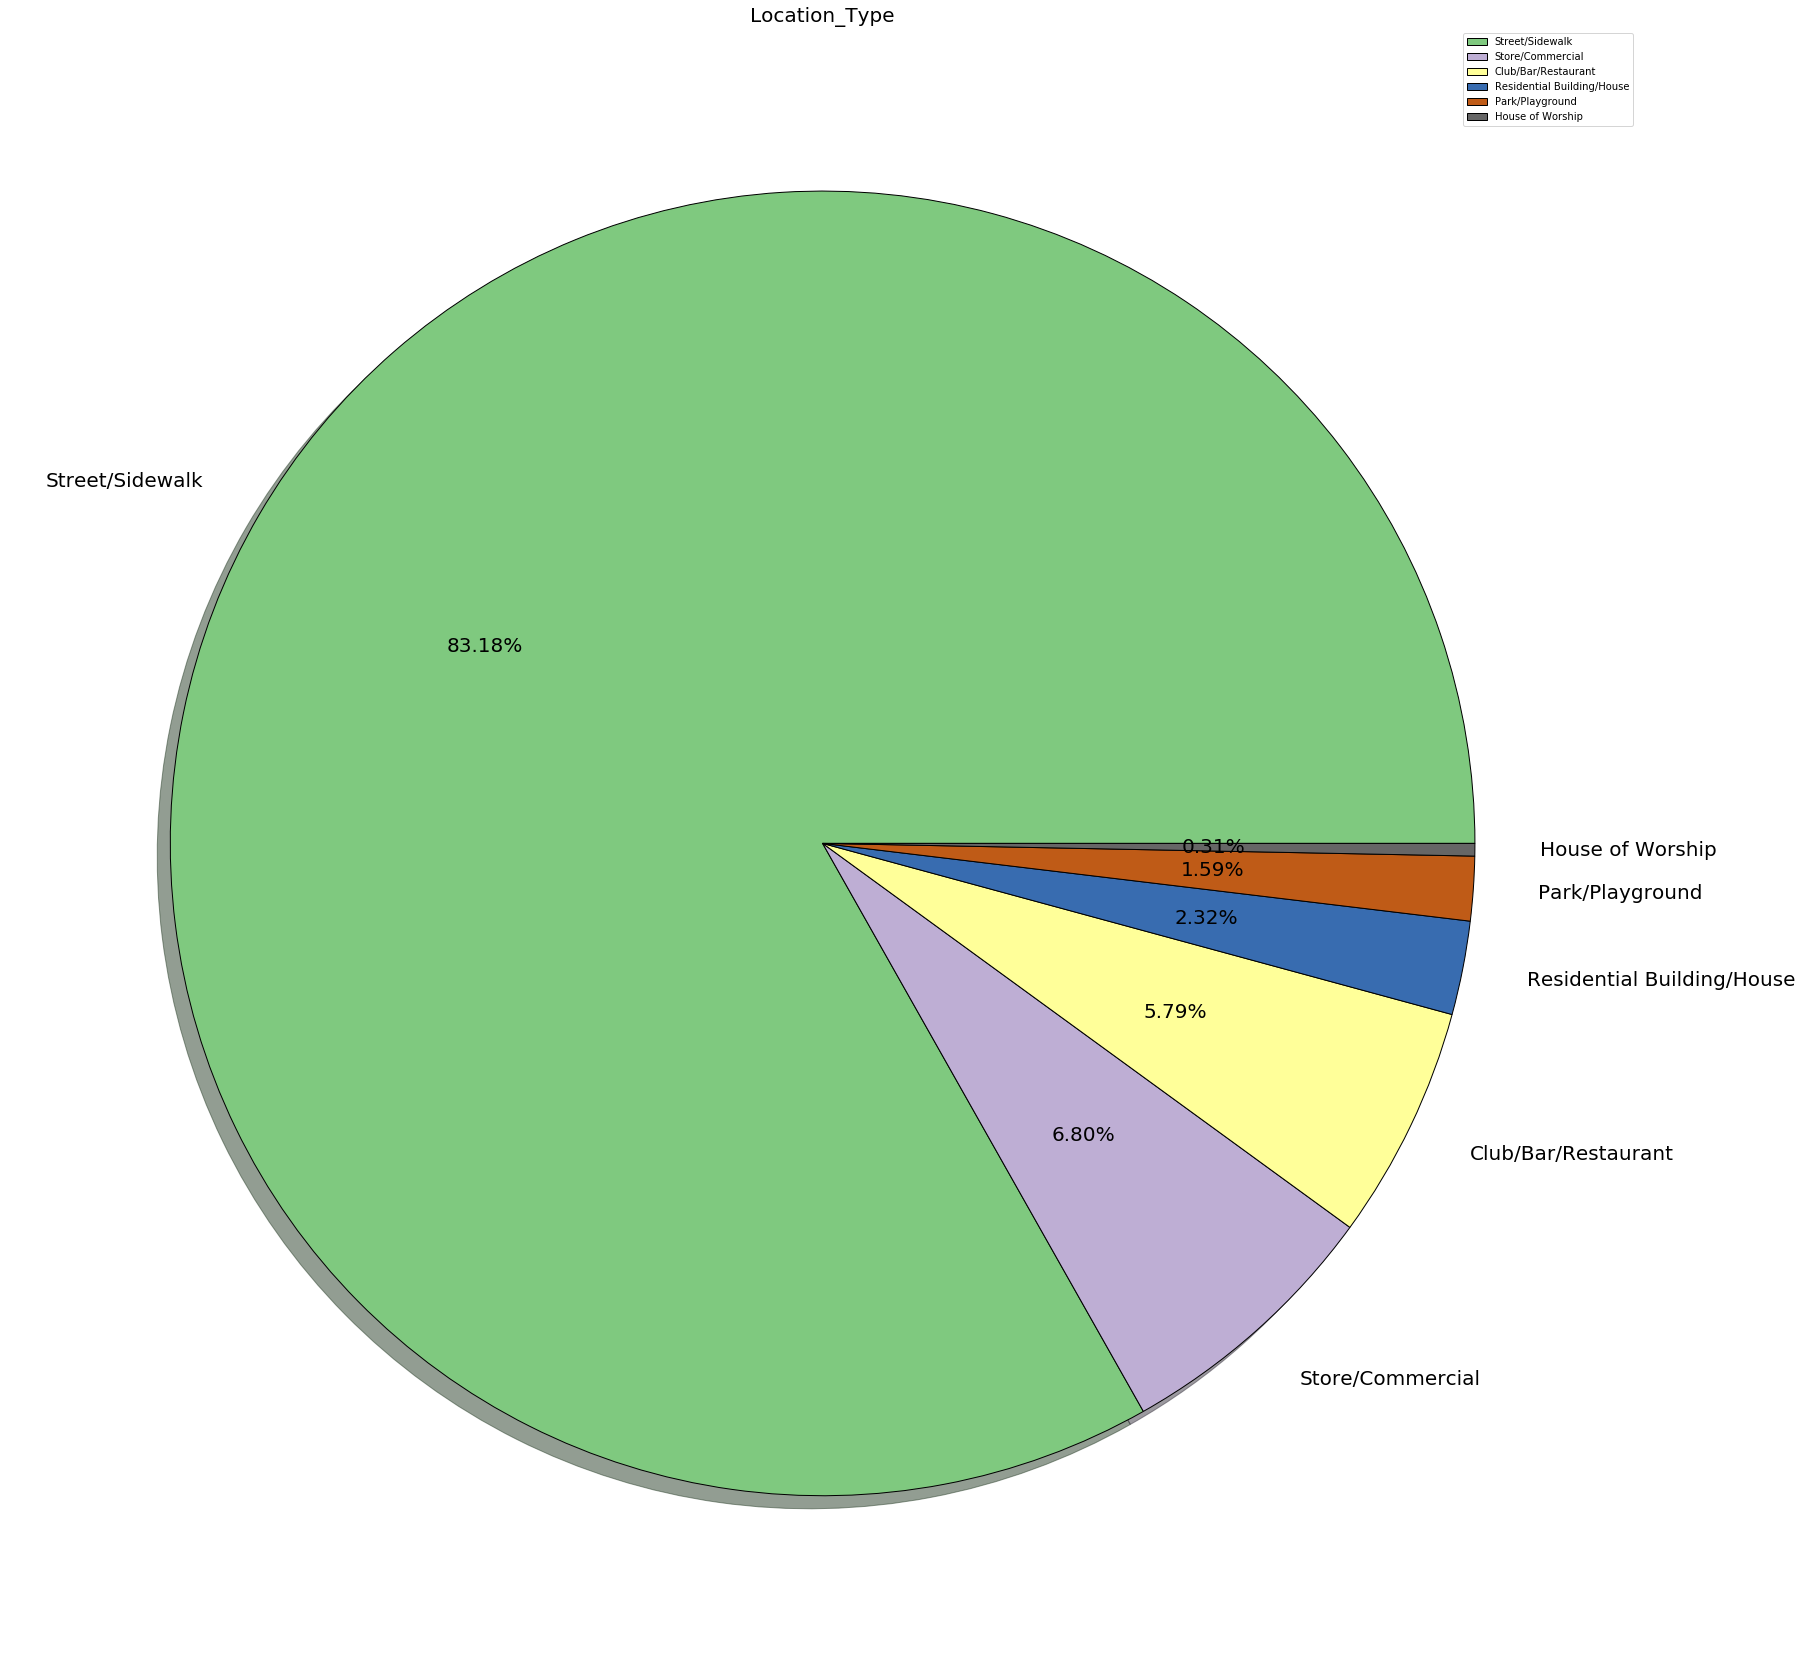

In [14]:
z=nyc311_copy.Location_Type.value_counts().head(6) 
plt.figure(figsize = (100,30)) 
z.plot.pie(radius = 1, cmap = 'Accent', autopct = '%.2f%%', shadow = True,  wedgeprops = {'edgecolor': 'black'}, textprops = {'size' : 20}) 
plt.legend() 
plt.ylabel('') 
plt.title('Location_Type', fontdict= {'size' : 20}) 
plt.show()

#### The above pie chart has top 6 location_type and we see that the highest pecentage of location_type is street/sidewalk

In [15]:
a=pd.DatetimeIndex(nyc311_copy['Created Date']).month 
a

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
             3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
           dtype='int64', name='Created Date', length=300698)

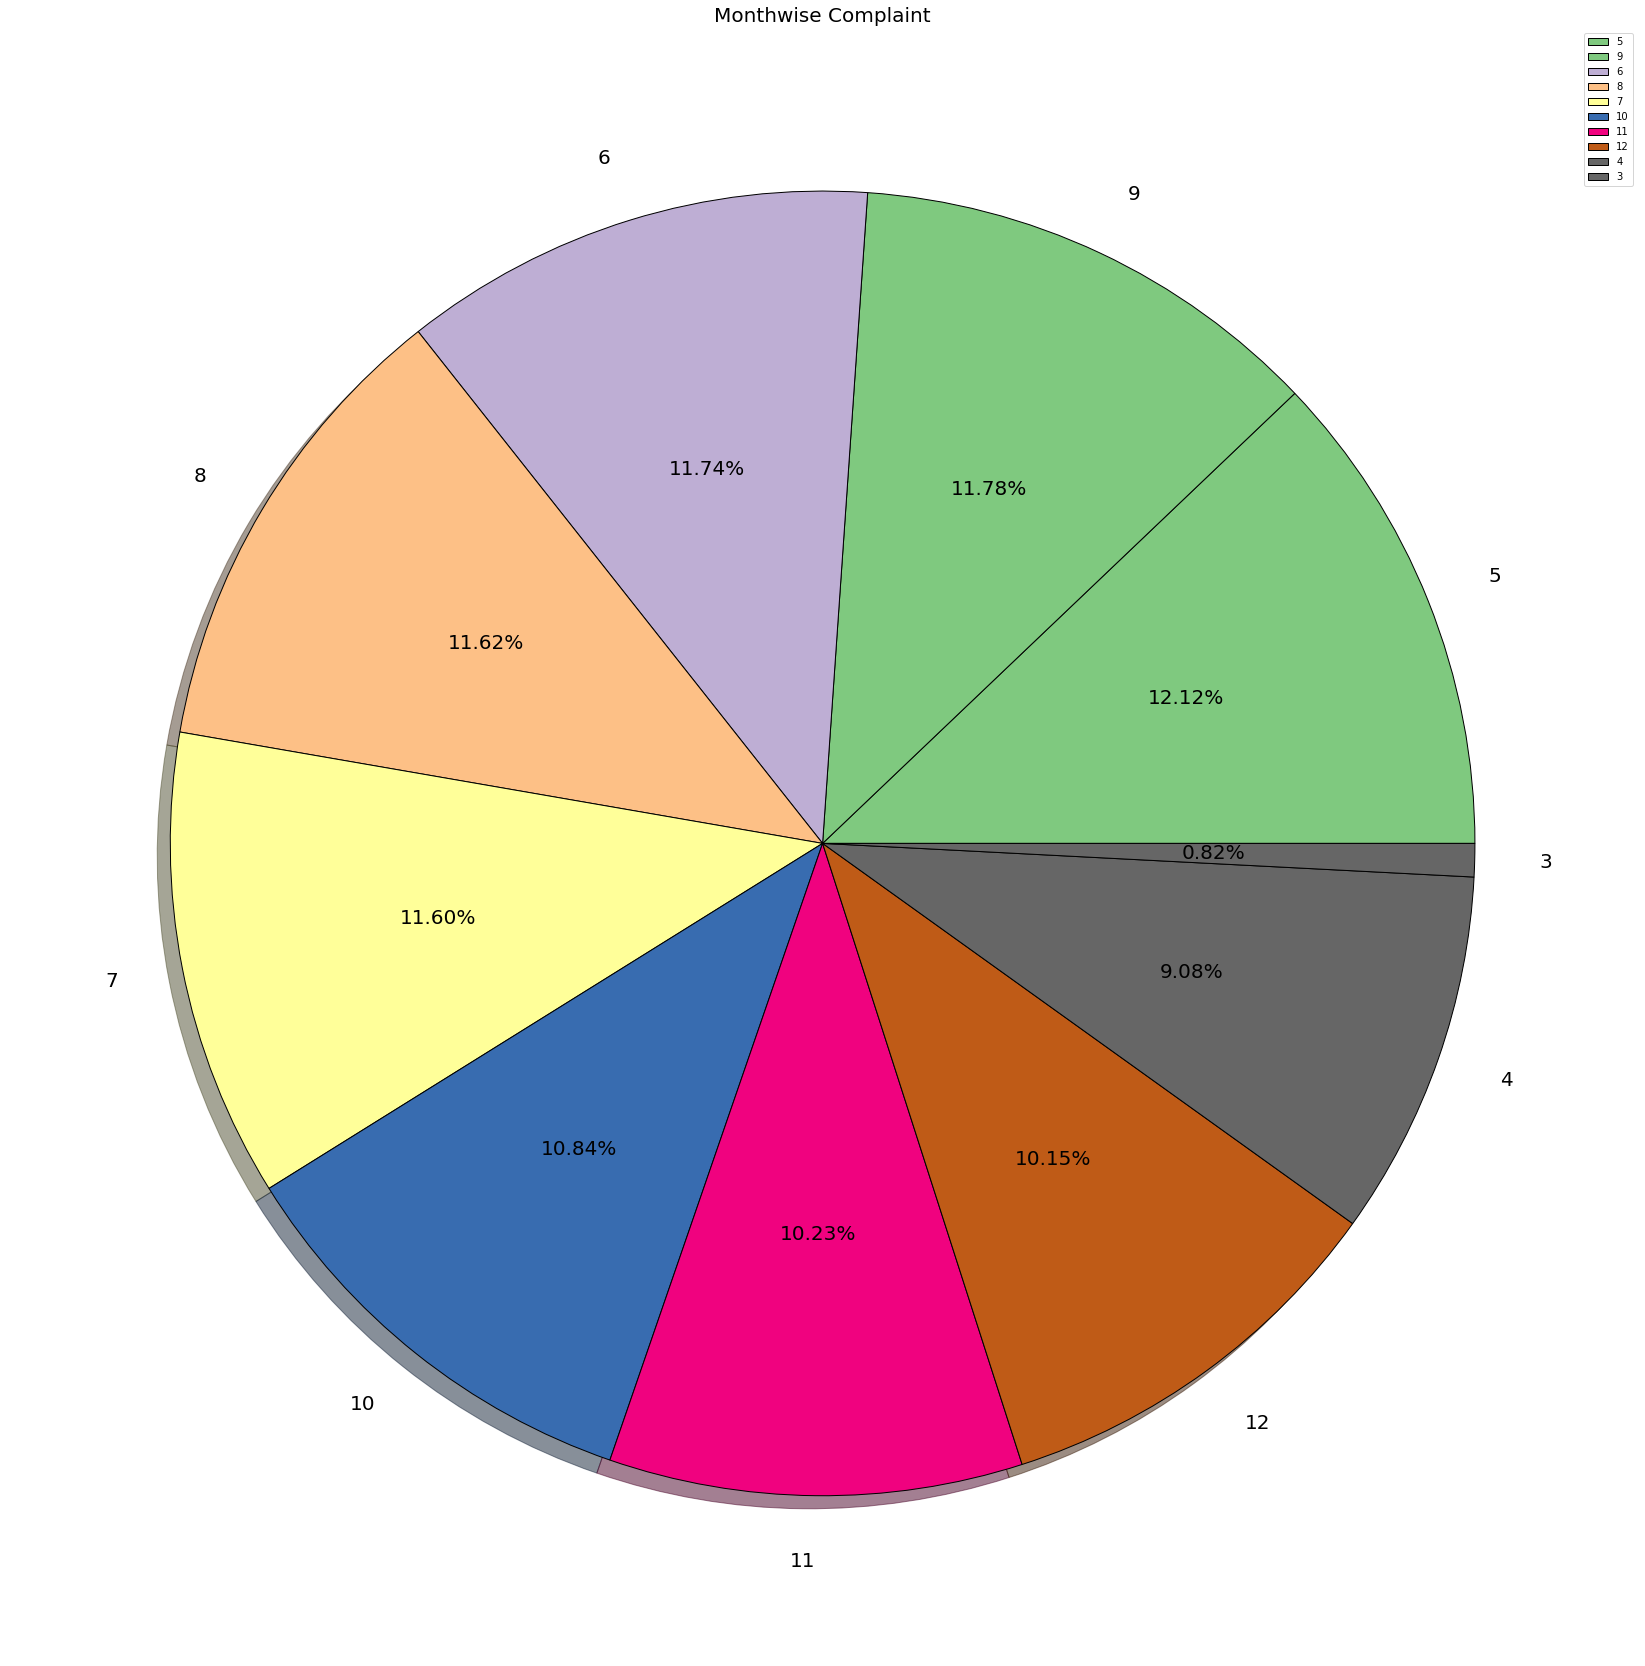

In [16]:
a=pd.DataFrame(a)
a=a.rename(columns={'Created Date':'Complaint_Month'})
t=a.Complaint_Month.value_counts() 
plt.figure(figsize = (100,30)) 
t.plot.pie(radius = 1, cmap = 'Accent', autopct = '%.2f%%', shadow = True, wedgeprops = {'edgecolor': 'black'}, textprops = {'size' : 20}) 
plt.legend() 
plt.ylabel('') 
plt.title('Monthwise Complaint', fontdict= {'size' : 20}) 
plt.show()

### From the above pie chart we can conclude that 5th month of the year has the highest percentage of complaint registration and 3rd month of the year has the least percentage of complaint registration.

In [56]:
df_newYork = nyc311_copy[nyc311_copy['City']=='NEW YORK']
df_newYork

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint_Type,Descriptor,Location_Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3315.0
6,32306559,12/31/2015 11:55:32 PM,01-01-16 1:53,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,524 WEST 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",7048.0
19,32308195,12/31/2015 11:40:55 PM,01-01-16 0:28,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10026.0,264 WEST 118 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.805267,-73.953353,"(40.80526715877265, -73.9533526205901)",2825.0
23,32308765,12/31/2015 11:32:46 PM,01-01-16 0:25,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Vehicle,Street/Sidewalk,10030.0,133 WEST 134 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.814002,-73.942664,"(40.814001537165495, -73.94266395083876)",3134.0
26,32305916,12/31/2015 11:26:41 PM,12/31/2015 11:53:31 PM,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,10031.0,452 WEST 147 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.826102,-73.945663,"(40.826101709196, -73.94566339279595)",1610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300686,30281145,03/29/2015 12:43:06 AM,03/29/2015 12:57:23 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10014.0,185 CHRISTOPHER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.732486,-74.009688,"(40.73248568650513, -74.00968804444769)",857.0
300688,30280732,03/29/2015 12:37:15 AM,03/29/2015 01:02:39 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10014.0,22 9 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.740361,-74.005781,"(40.74036064515079, -74.00578103597579)",1524.0
300691,30279999,03/29/2015 12:35:04 AM,03/29/2015 02:52:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10034.0,97 SHERMAN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.863805,-73.925358,"(40.863805379005, -73.92535778152539)",8244.0
300692,30281370,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,81 HESTER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.716053,-73.991378,"(40.71605290789855, -73.99137850370803)",2309.0


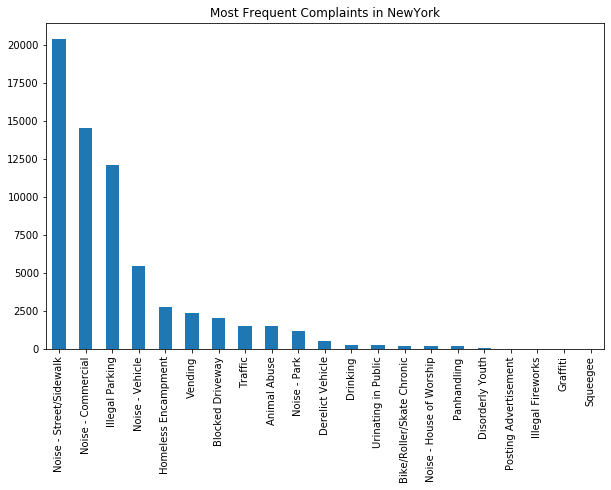

In [68]:
(df_newYork['Complaint_Type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in NewYork')

(-74.0369883058105, -73.7074581041895, 40.67225347095756, 40.89306800904242)

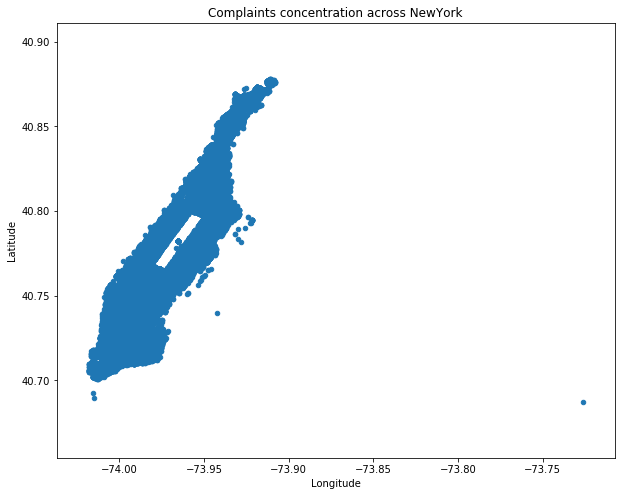

In [65]:
df_newYork[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration across NewYork').axis('equal')

(-74.01800237029157, -73.72644403970844, 40.6874323, 40.87788918)

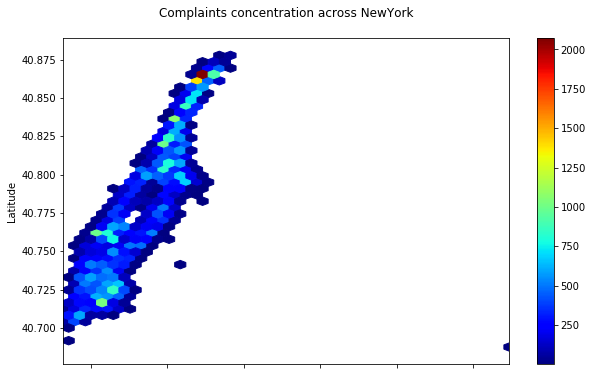

In [66]:
df_newYork.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across NewYork\n', figsize=(10,6)).axis('equal')

### Q4

In [ ]:
nyc311_copy['Request_Closing_Time'].fillna(nyc311_copy['Request_Closing_Time'].mean(),inplace=True)
nyc311_copy['Request_Closing_Time']=nyc311_copy['Request_Closing_Time'].dt.total_seconds()

In [70]:
nyc311_copy.groupby(['City','Complaint_Type']).mean()[['Request_Closing_Time']].round(2).sort_values(by=["City","Request_Closing_Time"], ascending= False)

Request_Closing_Time
City     Complaint_Type                               
Woodside Blocked Driveway                     23062.36
         Illegal Parking                      18789.13
         Derelict Vehicle                     17880.00
         Noise - Street/Sidewalk              12280.60
         Noise - Commercial                    8619.00
...                                                ...
ARVERNE  Noise - Park                          4620.00
         Panhandling                           3720.00
         Urinating in Public                   2491.00
         Vending                               1740.00
         Drinking                               859.00

[764 rows x 1 columns]

### Q5a

#### H0:The average response time across complaint types is similar 
#### Ha:There is atleast one complaint type whose average response time is significantly different from the others 
#### alpha=0.05

In [28]:
Top5=nyc311_copy.Complaint_Type.value_counts()[:5].index 
Top5

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [30]:
Sample_Data=nyc311_copy.loc[nyc311_copy.Complaint_Type.isin(Top5), ['Complaint_Type','Request_Closing_Time']] 
Sample_Data=pd.DataFrame(Sample_Data)

In [32]:
import math 
import scipy.stats as stats

In [33]:
grand_mean=Sample_Data.Request_Closing_Time.mean() 
grand_mean

15777.999263502448

In [34]:
group_mean=Sample_Data.groupby('Complaint_Type').mean()['Request_Closing_Time'] 
group_mean

Complaint_Type
Blocked Driveway           17062.595204
Derelict Vehicle           26430.347402
Illegal Parking            16196.749756
Noise - Commercial         11368.732997
Noise - Street/Sidewalk    12437.307586
Name: Request_Closing_Time, dtype: float64

In [35]:
group_variance=Sample_Data.groupby('Complaint_Type').var()['Request_Closing_Time'] 
group_variance

Complaint_Type
Blocked Driveway           4.015047e+08
Derelict Vehicle           1.583178e+09
Illegal Parking            4.576648e+08
Noise - Commercial         2.146697e+08
Noise - Street/Sidewalk    3.804762e+08
Name: Request_Closing_Time, dtype: float64

In [36]:
group_size=Sample_Data.groupby('Complaint_Type').size() 
group_size

Complaint_Type
Blocked Driveway           77044
Derelict Vehicle           17718
Illegal Parking            75361
Noise - Commercial         35577
Noise - Street/Sidewalk    48612
dtype: int64

In [37]:
deviation=group_mean-grand_mean 
squared_deviation=deviation**2*group_size 
sum_squared_deviation_between=squared_deviation.sum() 
df_between=group_mean.size-1 
mean_squared_deviation_between=sum_squared_deviation_between/df_between

In [38]:
sum_squared_deviation_group=group_variance*group_size 
sum_squared_deviation_within=sum_squared_deviation_group.sum() 
df_within=Sample_Data.Request_Closing_Time.size-group_mean.size 
mean_squared_deviation_within=sum_squared_deviation_within/df_within

In [39]:
F=mean_squared_deviation_between/mean_squared_deviation_within 
F

1799.3096008432897

In [40]:
p_value=1-(stats.f.cdf(F, df_between,df_within)) 
p_value

1.1102230246251565e-16

##### since p_value is less than alpha we reject the null hypothesis. 

### Q5b

In [42]:
top5=nyc311_copy.Complaint_Type.value_counts()[:5].index 
top5

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [44]:
sample_data=nyc311_copy.loc[nyc311_copy.Complaint_Type.isin(Top5), ['Complaint_Type','Location']] 
sample_data=pd.DataFrame(sample_data) 
sample_data

,Complaint_Type,Location
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)"
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)"
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)"
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)"
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)"
...,...,...
300693,Noise - Commercial,NaN
300694,Blocked Driveway,"(40.69407728322387, -73.8460866160573)"
300695,Noise - Commercial,"(40.69959035300927, -73.94423377144169)"
300696,Noise - Commercial,"(40.8377075854206, -73.83458731019586)"


In [45]:
sample_data.dropna( axis=0, how='any', thresh=None, subset=None, inplace=True) 
sample_data

,Complaint_Type,Location
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)"
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)"
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)"
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)"
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)"
...,...,...
300692,Noise - Commercial,"(40.71605290789855, -73.99137850370803)"
300694,Blocked Driveway,"(40.69407728322387, -73.8460866160573)"
300695,Noise - Commercial,"(40.69959035300927, -73.94423377144169)"
300696,Noise - Commercial,"(40.8377075854206, -73.83458731019586)"


In [46]:
sample_data['Complaint_Type']=sample_data['Complaint_Type'].astype('category') 
sample_data['Complaint_Type'].dtypes

CategoricalDtype(categories=['Blocked Driveway', 'Derelict Vehicle', 'Illegal Parking',
                  'Noise - Commercial', 'Noise - Street/Sidewalk'],
                 ordered=False)

In [47]:
sample_data['Location']=sample_data['Location'].astype('category') 
sample_data['Location'].dtypes

CategoricalDtype(categories=['(40.49913462101514, -74.24348482977875)',
                  '(40.49967332981336, -74.2379063249761)',
                  '(40.49994886080869, -74.23740031497493)',
                  '(40.49999700116009, -74.23801175120917)',
                  '(40.50002168207532, -74.23802262609722)',
                  '(40.500053572554975, -74.23720292425104)',
                  '(40.501254659258244, -74.2403930159996)',
                  '(40.50127930227959, -74.24042187057385)',
                  '(40.50128757437427, -74.2404039215757)',
                  '(40.50132048948916, -74.24041482716255)',
                  ...
                  '(40.91123916382892, -73.9000876185285)',
                  '(40.91153313134157, -73.8972868955454)',
                  '(40.91158732064909, -73.90281501953135)',
                  '(40.911791854878935, -73.89810415195794)',
                  '(40.912115567502006, -73.90107762347019)',
                  '(40.91214873879165, -73.9013525396

In [48]:
sample_data["Complaint_Type_Cat"] = sample_data["Complaint_Type"].cat.codes 
sample_data.head()

,Complaint_Type,Location,Complaint_Type_Cat
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",4
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)",0
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)",0
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)",2
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)",2


In [50]:
sample_data["Location_Cat"] = sample_data["Location"].cat.codes 
sample_data.head()

,Complaint_Type,Location,Complaint_Type_Cat,Location_Cat
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",4,105395
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)",0,86067
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)",0,106433
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)",2,98001
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)",2,67277


In [51]:
crosstab = pd.crosstab(sample_data["Complaint_Type"], sample_data["Location"]) 
crosstab

Location,"(40.49913462101514, -74.24348482977875)","(40.49967332981336, -74.2379063249761)","(40.49994886080869, -74.23740031497493)","(40.49999700116009, -74.23801175120917)","(40.50002168207532, -74.23802262609722)","(40.500053572554975, -74.23720292425104)","(40.501254659258244, -74.2403930159996)","(40.50127930227959, -74.24042187057385)","(40.50128757437427, -74.2404039215757)","(40.50132048948916, -74.24041482716255)",...,"(40.91123916382892, -73.9000876185285)","(40.91153313134157, -73.8972868955454)","(40.91158732064909, -73.90281501953135)","(40.911791854878935, -73.89810415195794)","(40.912115567502006, -73.90107762347019)","(40.91214873879165, -73.9013525396225)","(40.91218391108232, -73.90075914042282)","(40.91220586223159, -73.90075187169981)","(40.91234427543014, -73.902133732632)","(40.912868795316655, -73.90247305278565)"
Complaint_Type,,,,,,,,,,,,,,,,,,,,,
Blocked Driveway,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,2,1,1,0,0,0
Derelict Vehicle,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Illegal Parking,1,0,1,1,1,1,1,1,1,1,...,2,1,0,2,0,0,0,1,0,2
Noise - Commercial,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Noise - Street/Sidewalk,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [52]:
stats.chi2_contingency(crosstab)

(877581.0103224257,
 0.0,
 442060,
 array([[0.30533236, 0.30533236, 0.30533236, ..., 0.30533236, 0.30533236,
         0.61066472],
        [0.06971987, 0.06971987, 0.06971987, ..., 0.06971987, 0.06971987,
         0.13943974],
        [0.29475837, 0.29475837, 0.29475837, ..., 0.29475837, 0.29475837,
         0.58951675],
        [0.13998894, 0.13998894, 0.13998894, ..., 0.13998894, 0.13998894,
         0.27997787],
        [0.19020046, 0.19020046, 0.19020046, ..., 0.19020046, 0.19020046,
         0.38040091]]))

#### p_value=0.0 which is less than alpha so we reject the null hypothesis